In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



## Importação e Pré-Processamento

### Importação

In [49]:
# Read the CSV file
df_train = pd.read_csv('dados_trabalho1/conjunto_de_treinamento.csv')
# Read the test CSV file
df_test = pd.read_csv('dados_trabalho1/conjunto_de_teste.csv')


In [50]:
df_train.describe()

,id_solicitante,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,grau_instrucao,nacionalidade,tipo_residencia,...,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,19464.000000,...,2.000000e+04,20000.000000,20000.000000,16903.000000,17022.000000,8486.000000,7140.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1.284350,13.147250,1.006350,42.352500,2.120850,0.666400,0.0,0.961600,1.261303,...,2.095614e+03,0.339050,0.008900,8.045081,2.533310,3.708107,0.288095,581.295250,581.295250,0.500000
std,5773.647028,1.008239,6.748507,0.079435,14.930177,1.332004,1.236725,0.0,0.202305,0.883580,...,4.403344e+04,0.473399,0.388881,3.210790,1.532765,5.181241,0.944339,227.369798,227.369798,0.500013
min,1.000000,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000
25%,5000.750000,1.000000,10.000000,1.000000,31.000000,1.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,444.000000,444.000000,0.000000
50%,10000.500000,1.000000,10.000000,1.000000,40.000000,2.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,596.000000,596.000000,0.500000
75%,15000.250000,1.000000,20.000000,1.000000,52.000000,2.000000,1.000000,0.0,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,728.000000,728.000000,1.000000
max,20000.000000,7.000000,25.000000,2.000000,106.000000,7.000000,53.000000,0.0,2.000000,5.000000,...,6.000000e+06,1.000000,32.000000,17.000000,5.000000,17.000000,5.000000,999.000000,999.000000,1.000000


### Verificação manual de atributos

<!-- É interessante verificar manualmente quais colunas não podem influenciar a variável inadimplência, pois não faz sentido ... Isso evita que o modelo perca processamento com colunas que não influenciam a variável alvo. -->


In [51]:
df_train.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

In [52]:
excluded_columns = ['id_solicitante' ]
df_train = df_train.drop(excluded_columns, axis=1)
df_test = df_test.drop(excluded_columns, axis=1)

### Codificação de atributos não numéricos.


In [53]:

# Criar uma cópia dos dataframes originais
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Identificar colunas do tipo String
string_columns = df_train.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
le = LabelEncoder()

# Codificar colunas do tipo String no dataframe de treino
for col in string_columns:
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

# Codificar colunas do tipo String no dataframe de teste
for col in string_columns:
    df_test_encoded[col] = le.fit_transform(df_test_encoded[col])

# Exibir os novos dataframes codificados
print(df_train_encoded.head())

   produto_solicitado  dia_vencimento  forma_envio_solicitacao  tipo_endereco  \
0                   1              10                        2              1   
1                   1              25                        1              1   
2                   1              20                        1              1   
3                   1              20                        1              1   
4                   7               1                        1              1   

   sexo  idade  estado_civil  qtde_dependentes  grau_instrucao  nacionalidade  \
0     2     85             2                 0               0              1   
1     1     38             1                 0               0              1   
2     1     37             2                 0               0              1   
3     2     37             1                 1               0              1   
4     1     51             1                 3               0              1   

   ...  possui_telefone_tr

### Verificação de colunas e linhas com null / NaN

In [54]:
# Verificar quais colunas têm valores nulos
null_columns = df_train_encoded.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64


In [55]:
# Filtrar apenas as colunas não nulas
non_null_columns = df_train_encoded.dropna(axis=1).columns

# DataFrame sem colunas nulas
df_no_null_columns = df_train_encoded.drop(columns=null_columns.index)

# Criar um DataFrame sem linhas com valores nulos
null_columns_to_drop = ['profissao_companheiro','grau_instrucao_companheiro']
df_no_null_rows = df_train_encoded.drop(columns=null_columns_to_drop).dropna()


### Normalização

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Normalizar os dados
df_no_null_columns_normalized = pd.DataFrame(scaler.fit_transform(df_no_null_columns), columns=df_no_null_columns.columns)

# Armazenar os parâmetros de normalização
normalization_mask = pd.DataFrame({
    'min': scaler.data_min_,
    'max': scaler.data_max_,
    'scale': scaler.scale_,
    'min_max_range': scaler.data_range_
}, index=df_no_null_columns.columns)




In [57]:
# Inicializar o MinMaxScaler
scaler_rows = MinMaxScaler()

# Normalizar os dados
df_no_null_rows_normalized = pd.DataFrame(scaler_rows.fit_transform(df_no_null_rows), columns=df_no_null_rows.columns)

# Armazenar os parâmetros de normalização
normalization_mask_rows = pd.DataFrame({
    'min': scaler_rows.data_min_,
    'max': scaler_rows.data_max_,
    'scale': scaler_rows.scale_,
    'min_max_range': scaler_rows.data_range_
}, index=df_no_null_rows.columns)


In [58]:
# Exibir os dados normalizados
print(df_no_null_columns_normalized.head())


   produto_solicitado  dia_vencimento  forma_envio_solicitacao  tipo_endereco  \
0                 0.0        0.375000                      1.0            0.0   
1                 0.0        1.000000                      0.5            0.0   
2                 0.0        0.791667                      0.5            0.0   
3                 0.0        0.791667                      0.5            0.0   
4                 1.0        0.000000                      0.5            0.0   

       sexo     idade  estado_civil  qtde_dependentes  grau_instrucao  \
0  0.666667  0.787879      0.285714          0.000000             0.0   
1  0.333333  0.313131      0.142857          0.000000             0.0   
2  0.333333  0.303030      0.285714          0.000000             0.0   
3  0.666667  0.303030      0.142857          0.018868             0.0   
4  0.333333  0.444444      0.142857          0.056604             0.0   

   nacionalidade  ...  valor_patrimonio_pessoal  possui_carro  \
0        

In [59]:
df_no_null_columns = df_no_null_columns_normalized
df_no_null_rows = df_no_null_rows_normalized

### Reducao de dimensionalidade

In [85]:
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA

rdModel = 1
if (rdModel == 0):
    # Inicializar o modelo ICA
    n_components = 15
    ica = FastICA(n_components=n_components, random_state=42)

    # Ajustar o modelo e transformar os dados
    df_no_null_rows_ica = ica.fit_transform(df_no_null_rows.drop(columns=['inadimplente']))

    # Converter o resultado de volta para um DataFrame
    df_no_null_rows_ica = pd.DataFrame(df_no_null_rows_ica, columns=[f'ICA_{i}' for i in range(1, n_components+1)])

    # Adicionar a coluna 'inadimplente' de volta ao DataFrame
    df_no_null_rows_ica['inadimplente'] = df_no_null_rows['inadimplente'].values

    # Exibir os dados transformados
    print(df_no_null_rows_ica.head())
elif(rdModel == 1):
    # Inicializar o modelo PCA
    n_components = 15
    pca = PCA(n_components=n_components, random_state=42)

    # Ajustar o modelo e transformar os dados
    df_no_null_rows_pca = pca.fit_transform(df_no_null_rows.drop(columns=['inadimplente']))

    # Converter o resultado de volta para um DataFrame
    df_no_null_rows_pca = pd.DataFrame(df_no_null_rows_pca, columns=[f'PCA_{i}' for i in range(1, n_components+1)])

    # Adicionar a coluna 'inadimplente' de volta ao DataFrame
    df_no_null_rows_pca['inadimplente'] = df_no_null_rows['inadimplente'].values

    # Exibir os dados transformados
    print(df_no_null_rows_pca.head())

      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0  1.240639 -0.051283 -0.212467 -0.241704 -0.206466  0.169037 -0.011379   
1 -0.235623 -0.836452  0.735467  0.355245 -0.018938 -0.333179 -0.219856   
2 -1.172757  0.702935  0.379386  0.511783 -0.229665  0.230155 -0.127776   
3  0.003431  0.019299  0.236834 -0.675799 -0.204443 -0.058546  0.506040   
4  0.204513  0.988240 -0.250792 -0.479262  0.478983  0.168605  0.184638   

      PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13    PCA_14  \
0 -0.122349 -0.337833  0.016472  0.006525 -0.355569  0.175633  0.114899   
1  0.475077  0.124420  0.235903 -0.055483  0.311377 -0.204903 -0.225606   
2  0.002630  0.049134  0.322575  0.037394 -0.084104  0.094094 -0.133384   
3  0.100699  0.237623 -0.680846 -0.032567  0.508055  0.072962 -0.120173   
4  0.206605 -0.560637  0.372536 -0.643545 -0.497390  0.051136 -0.153360   

     PCA_15  inadimplente  
0 -0.093508           0.0  
1 -0.045868           0.0  
2 -0.090114   

## Determinar dataSet usado

In [86]:
#usingDataset = df_no_null_rows_ica
usingDataset = df_no_null_rows_pca

## Testes e Visualização

### Teste de Correlação Linear

In [ ]:
correlation_series = pd.Series(index=usingDataset.columns, dtype=float)

In [ ]:
# Calcular a correlação de todas as outras colunas com a coluna 'inadimplente'
for col in usingDataset.columns:
    if col != 'inadimplente':
        correlation_series[col] = usingDataset[[col, 'inadimplente']].corr().iloc[0, 1]


In [14]:
# Dentre as colunas que tem nulo, há algum atributo com grande correlação não linear , considerando todas suas linhas?
maxVal = -10000
maxName = ""
for col in null_columns.index:
    df_non_null = df_train_encoded[[col, 'inadimplente']].dropna()
    correlation = df_non_null.corr().iloc[0, 1]
    correlation_series[col] = correlation
    if abs(correlation) > maxVal:
        maxVal = correlation
        maxName = col
    print(f"Coluna com nulos: {col}, número de linhas excluidas: {df_train_encoded.shape[0] - df_non_null.shape[0]}, Correlação: {correlation}")

Coluna com nulos: tipo_residencia, número de linhas excluidas: 536, Correlação: 0.01822277038081267
Coluna com nulos: meses_na_residencia, número de linhas excluidas: 1450, Correlação: -0.033552686423211936
Coluna com nulos: profissao, número de linhas excluidas: 3097, Correlação: -0.014453995871419848
Coluna com nulos: ocupacao, número de linhas excluidas: 2978, Correlação: 0.04354700902916098
Coluna com nulos: profissao_companheiro, número de linhas excluidas: 11514, Correlação: -0.037810453981578104
Coluna com nulos: grau_instrucao_companheiro, número de linhas excluidas: 12860, Correlação: -0.04169942240206396


In [15]:
# Maximo valor de correlação dentre as colunas que nao tem nulo.
print('Máxima correlação entre as colunas com nulo: ', maxName, maxVal)

Máxima correlação entre as colunas com nulo:  ocupacao 0.04354700902916098


In [16]:
# Maximo valor de correlação dentre as colunas que nao tem nulo.
print('Máxima correlação entre todas as: ', correlation_series.idxmax(), correlation_series.max())

Máxima correlação entre todas as:  dia_vencimento 0.08033829811549492


Concluí-se que não há correlação linear considerável entre algum atributo e a inadimplência.

### Visualização de dados

#### Nuvem de pontos dois a dois

In [87]:
usingDataset.columns.to_list()

['PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9',
 'PCA_10',
 'PCA_11',
 'PCA_12',
 'PCA_13',
 'PCA_14',
 'PCA_15',
 'inadimplente']

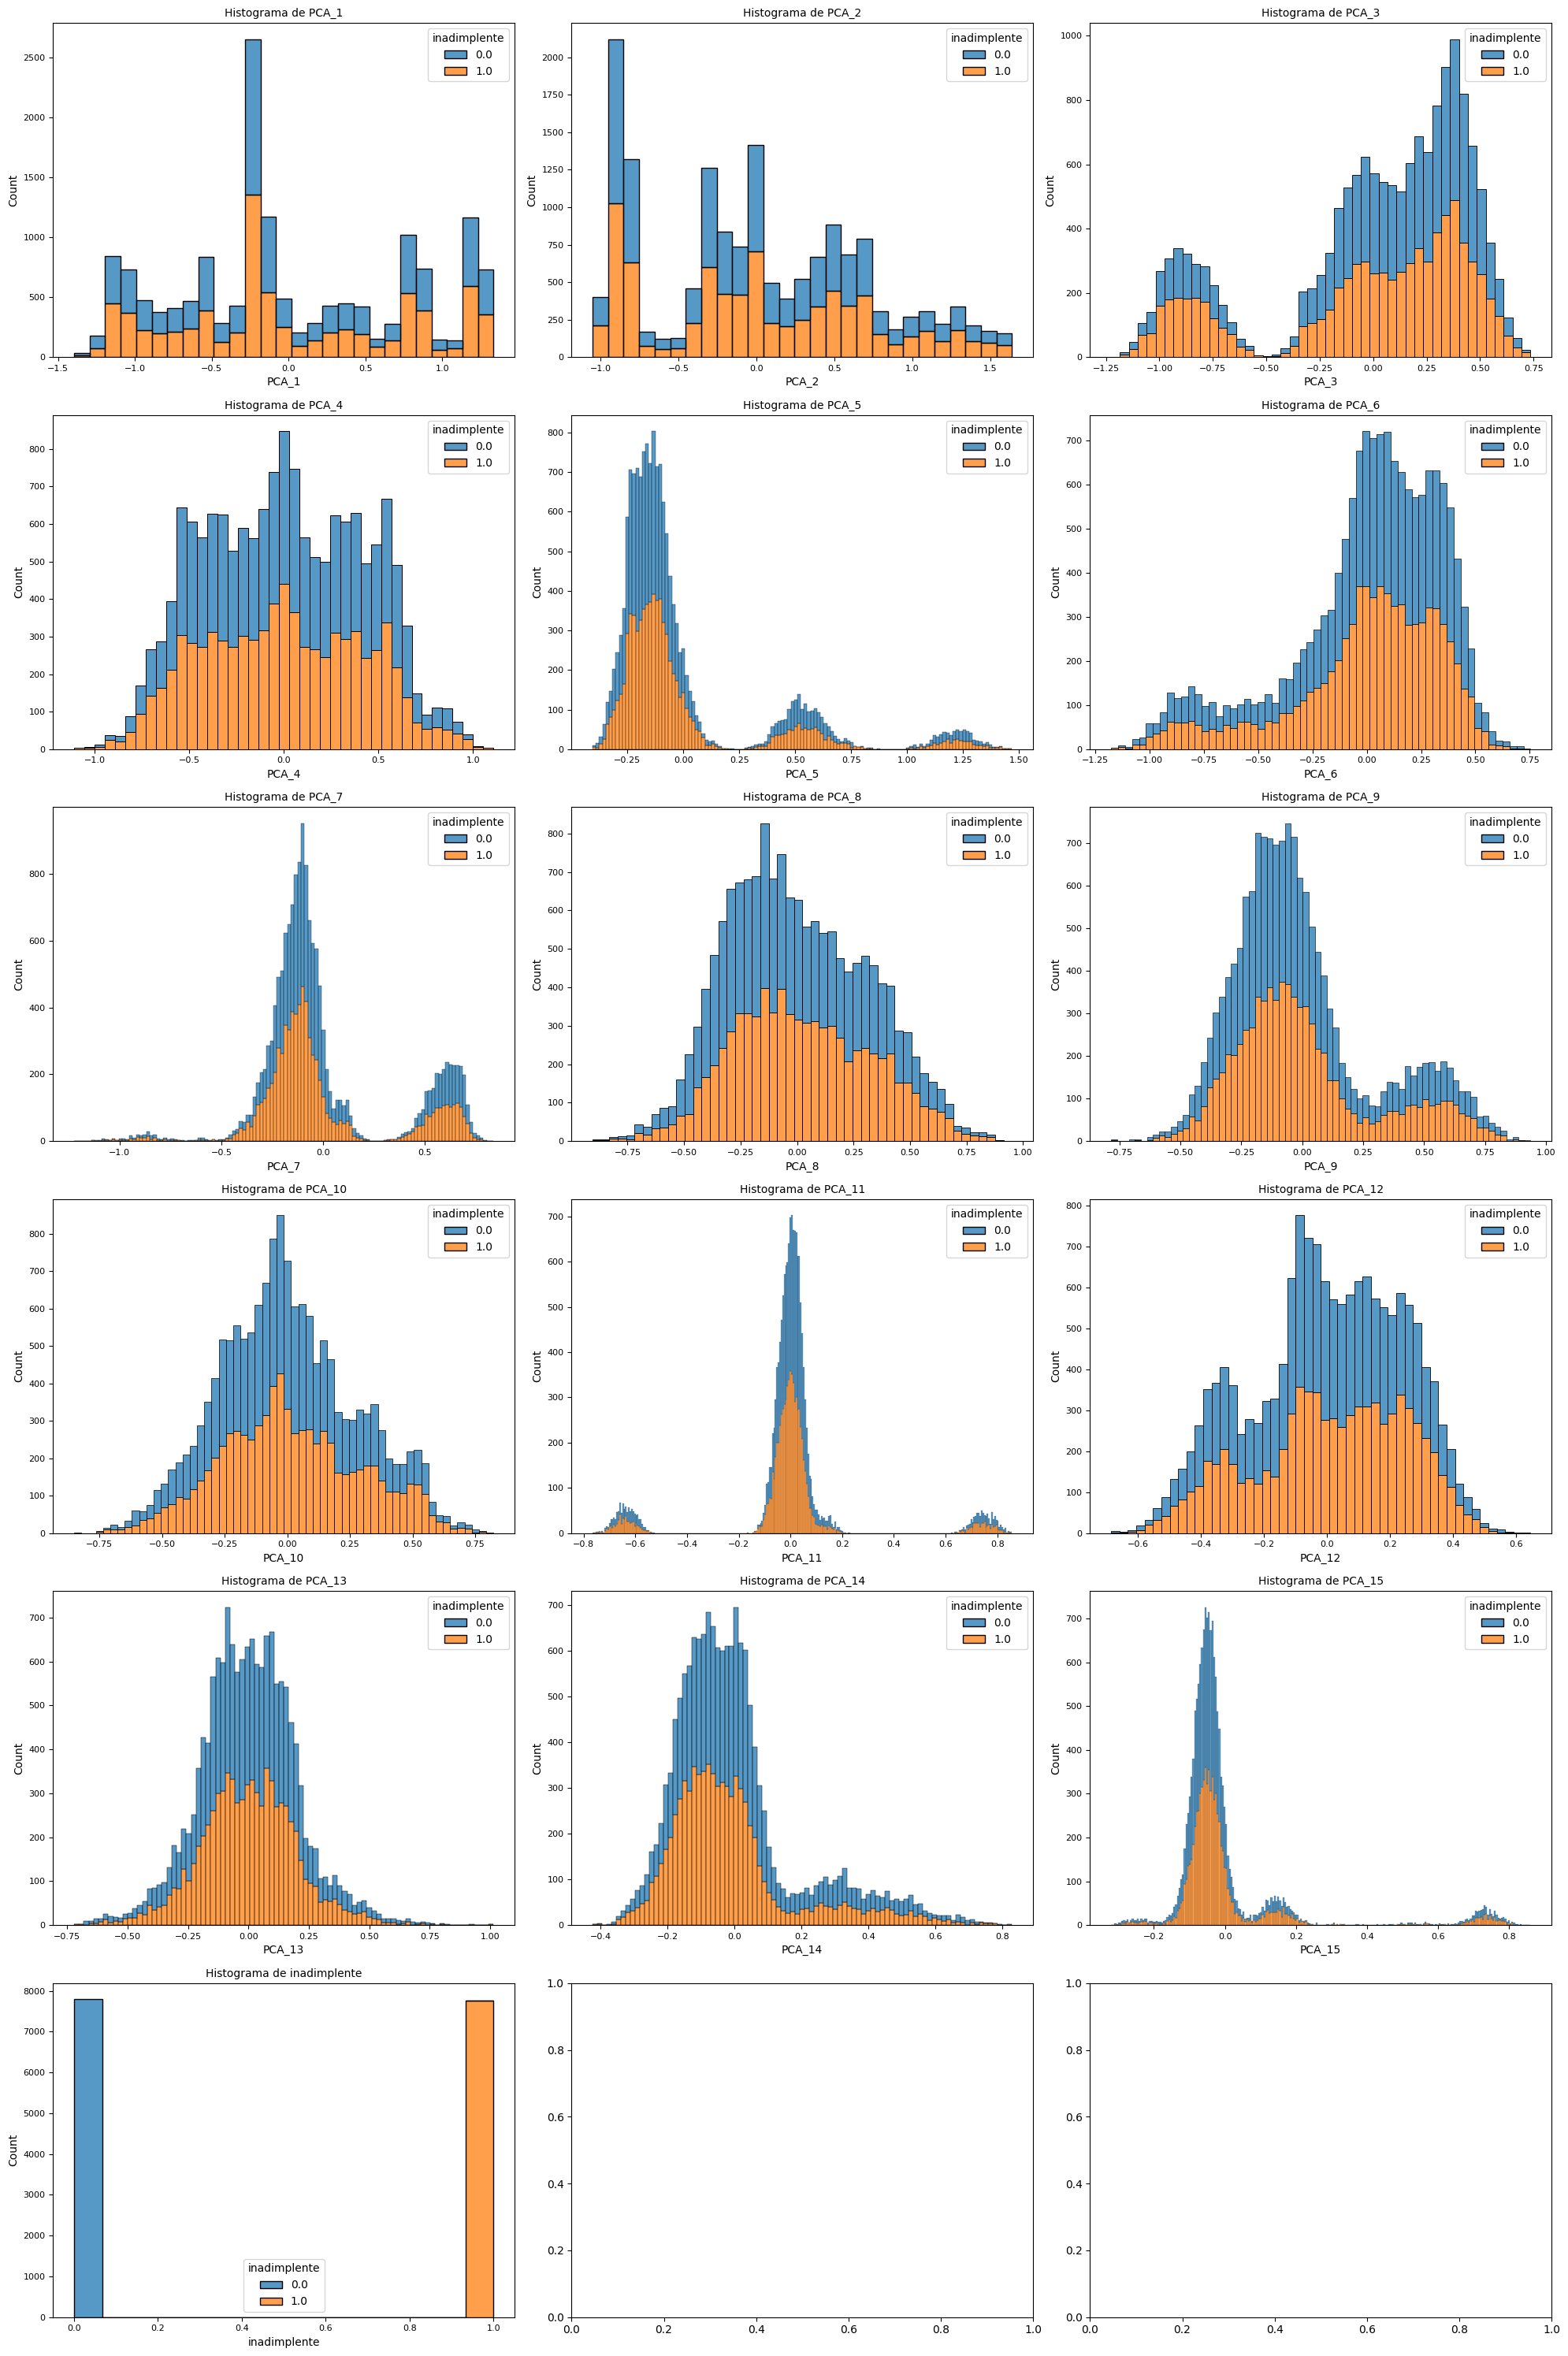

In [88]:
# Selecionar os atributos que queremos visualizar
attributes1 = ['valor_patrimonio_pessoal','renda_extra','meses_no_trabalho']# df_no_null_columns.columns# [0:5]

attributes2 = ['valor_patrimonio_pessoal','renda_extra','meses_no_trabalho' , 'possui_telefone_residencial', 'estado_civil' , 'dia_vencimento', 'codigo_area_telefone_residencial'] 

attributes3 = usingDataset.columns.to_list()


attributes = attributes3

# Definir o número de colunas
num_cols = 3

# Calcular o número de linhas necessárias
num_rows = int(np.ceil(len(attributes) / num_cols))

# Criar uma grade de subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Iterar sobre os atributos para criar os histogramas
for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=usingDataset, x=attribute, hue='inadimplente', multiple='stack', ax=axs[row, col])
    axs[row, col].set_title(f'Histograma de {attribute}', fontsize=10)
    axs[row, col].tick_params(axis='both', which='major', labelsize=8)

# Ajustar o layout
plt.tight_layout()
plt.show()

In [135]:
null_columns

tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64

#### Displot / densidade

In [138]:
null_columns

tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64

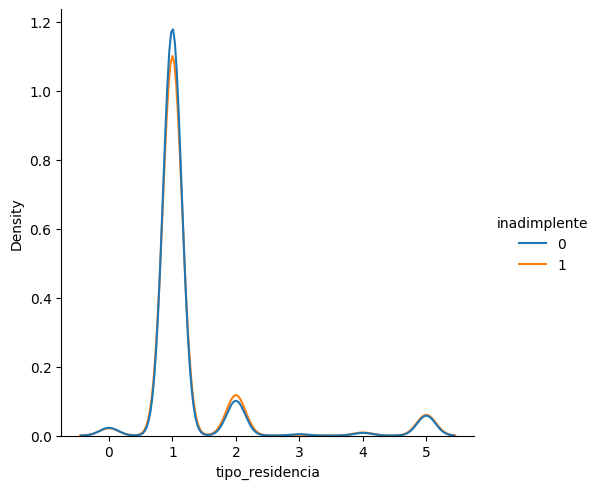

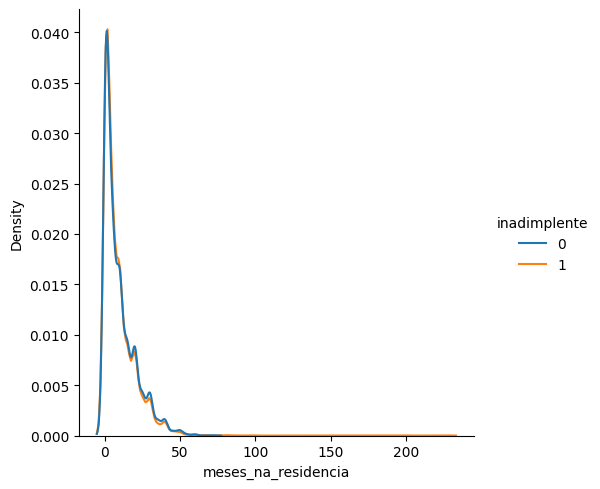

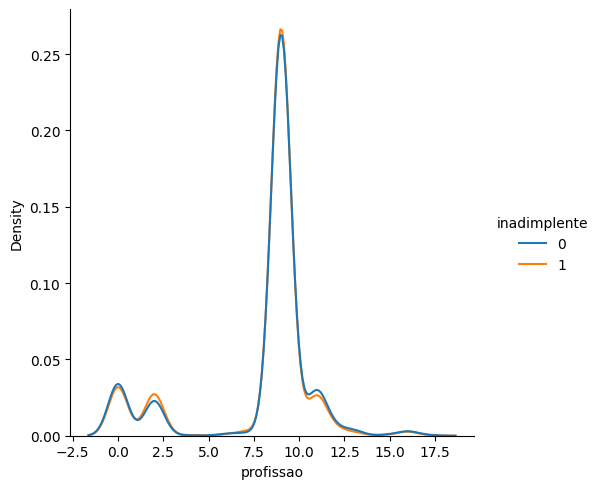

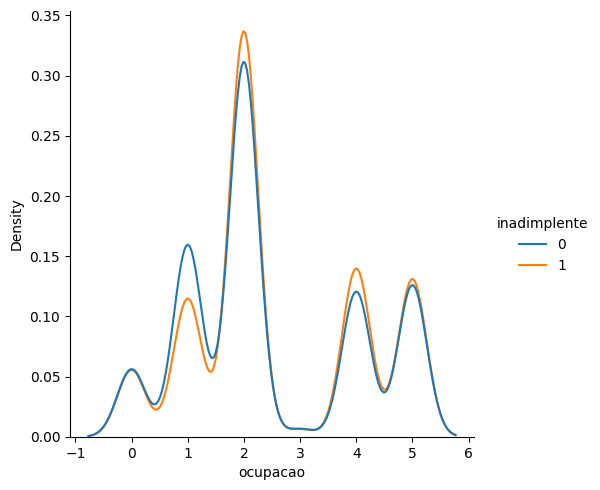

In [141]:
# Displot
import plotly.express as px

# Selecionar os atributos que queremos visualizar
attributes = ['tipo_residencia', 'meses_na_residencia', 'profissao', 'ocupacao']

# Criar gráficos de distribuição marginal para cada atributo em função da inadimplência
for attribute in attributes:
    fig = sns.displot(data= df_no_null_rows, x=attribute, hue='inadimplente', kind='kde')
    # Salvar a imagem
    plt.savefig(f'imgs/displot/displot_{attribute}.png')

## Treinamento

In [89]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Modelos de classificação binária supervisionada
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


# # Inicializar os modelos
# models = {
#     "Logistic Regression": LogisticRegression(penalty='l2', C=10.0),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Support Vector Machine": SVC(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Naive Bayes": GaussianNB()
# }



#### Divisão dos dados de treino e validação

In [63]:
# Definir o subset com os atributos a partir de uma seleção visual dos atributos baseado no histograma de densidade de inadimplentes e adimplentes em funcao desses atributos.

# subset = ('produto_solicitado', 'dia_vencimento', 'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade', 'estado_civil', 'qtde_dependentes', 'nacionalidade', 'estado_onde_nasceu', 'estado_onde_reside', 'possui_telefone_residencial', 'possui_email', 'possui_cartao_visa', 'possui_cartao_mastercard', 'possui_cartao_diners', 'possui_cartao_amex', 'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais', 'possui_carro', 'vinculo_formal_com_empresa', 'estado_onde_trabalha', 'possui_telefone_trabalho', 'codigo_area_telefone_trabalho', 'meses_no_trabalho')

subset = ('id_solicitante', 'produto_solicitado', 'dia_vencimento', 'sexo',
       'idade', 'estado_civil', 'qtde_dependentes', 'estado_onde_nasceu',
       'estado_onde_reside', 'possui_telefone_residencial',
       'codigo_area_telefone_residencial', 'tipo_residencia',
       'meses_na_residencia', 'renda_mensal_regular', 'renda_extra',
       'valor_patrimonio_pessoal', 'vinculo_formal_com_empresa',
       'estado_onde_trabalha', 'codigo_area_telefone_trabalho', 'profissao',
       'ocupacao', 'profissao_companheiro', 'grau_instrucao_companheiro',
       'local_onde_reside', 'local_onde_trabalha')


# Definir qual df será usado para treinamento e validação
df_base_code = 1


In [64]:
if (df_base_code == 0): # Usando DF sem colunas nulas
    X = df_no_null_columns.drop(columns=['inadimplente'])
    X = X.loc(axis=1)[subset]
    y = df_no_null_columns['inadimplente']
elif(df_base_code == 1): # Usando DF sem linhas com nulos
    
    #selecionar todas colunas (41)
    subset = df_no_null_rows.columns.to_list()
    subset.remove('inadimplente')

    X = df_no_null_rows.drop(columns=['inadimplente'])
    X = X.loc(axis=1)[subset]
    y = df_no_null_rows['inadimplente']

# Dividir os dados em treino e validação
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)




In [65]:
# # subset = ('valor_patrimonio_pessoal', 'renda_extra', 'produto_solicitado', 
# #           'possui_telefone_residencial', 'possui_outros_cartoes', 'possui_cartao_mastercard', 
# #           'possui_carro', 'meses_no_trabalho', 'estado_civil', 'dia_vencimento', 
# #           'codigo_area_telefone_residencial')

# # subset = ('valor_patrimonio_pessoal','renda_extra','meses_no_trabalho', )

# subset = ('valor_patrimonio_pessoal','renda_extra','meses_no_trabalho' , 'possui_telefone_residencial', 'estado_civil' , 'dia_vencimento', 'codigo_area_telefone_residencial')

# # 25
# subset = ('produto_solicitado', 'dia_vencimento', 'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade', 'estado_civil', 'qtde_dependentes', 'nacionalidade', 'estado_onde_nasceu', 'estado_onde_reside', 'possui_telefone_residencial', 'possui_email', 'possui_cartao_visa', 'possui_cartao_mastercard', 'possui_cartao_diners', 'possui_cartao_amex', 'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais', 'possui_carro', 'vinculo_formal_com_empresa', 'estado_onde_trabalha', 'possui_telefone_trabalho', 'codigo_area_telefone_trabalho', 'meses_no_trabalho')

# #rfe 25 com todos
# subset = ('id_solicitante', 'produto_solicitado', 'dia_vencimento', 'sexo',
#        'idade', 'estado_civil', 'qtde_dependentes', 'estado_onde_nasceu',
#        'estado_onde_reside', 'possui_telefone_residencial',
#        'codigo_area_telefone_residencial', 'tipo_residencia',
#        'meses_na_residencia', 'renda_mensal_regular', 'renda_extra',
#        'valor_patrimonio_pessoal', 'vinculo_formal_com_empresa',
#        'estado_onde_trabalha', 'codigo_area_telefone_trabalho', 'profissao',
#        'ocupacao', 'profissao_companheiro', 'grau_instrucao_companheiro',
#        'local_onde_reside', 'local_onde_trabalha')


#### RFE para seleção de atributos

##### CNN

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


In [92]:
# Definir a arquitetura da rede convolucional
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Obter a forma de entrada
input_shape = (X_train.shape[1], 1)

# Criar o modelo
cnn_model = create_cnn_model(input_shape)

# Treinar o modelo
cnn_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_data=(X_validate.values.reshape(-1, X_validate.shape[1], 1), y_validate))

# Fazer previsões nos dados de validação
y_pred_cnn = cnn_model.predict(X_validate.values.reshape(-1, X_validate.shape[1], 1))
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)

# Calcular a acurácia do modelo
score_cnn = accuracy_score(y_validate, y_pred_cnn)
print(f'Acurácia do modelo CNN: {score_cnn}')

Epoch 1/10


c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_1\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5062 - loss: 0.6938 - val_accuracy: 0.5562 - val_loss: 0.6860
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5606 - loss: 0.6863 - val_accuracy: 0.5663 - val_loss: 0.6813
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5697 - loss: 0.6827 - val_accuracy: 0.5481 - val_loss: 0.6820
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5629 - loss: 0.6817 - val_accuracy: 0.5716 - val_loss: 0.6779
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5846 - loss: 0.6770 - val_accuracy: 0.5720 - val_loss: 0.6806
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5769 - loss: 0.6789 - val_accuracy: 0.5778 - val_loss: 0.6780
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5719 - loss: 0.6773 - val_accuracy: 0.5746 - val_loss: 0.6765
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5765 - loss: 0.6774 - val_accuracy: 0.5710 - val_

#### KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inicializar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustar o modelo aos dados de treino
knn.fit(X_train, y_train)

# Fazer previsões nos dados de validação
y_pred_knn = knn.predict(X_validate)

# Calcular a acurácia do modelo
score = accuracy_score(y_validate, y_pred_knn)

print(f'Acurácia do modelo KNN: {score}')

Acurácia do modelo KNN: 0.5262256476129309


#### GradientBoostingClassifier

In [68]:
parameters = {'learning_rate': 0.25, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


gbc = GradientBoostingClassifier(
    learning_rate=parameters['learning_rate'],
    max_depth=parameters['max_depth'],
    max_features=parameters['max_features'],
    min_samples_leaf=parameters['min_samples_leaf'],
    min_samples_split=parameters['min_samples_split'],
    n_estimators=parameters['n_estimators'],
    subsample=parameters['subsample'],
    random_state=42,
)


# Ajustar o modelo
gbc.fit(X_train, y_train)

y_predict = gbc.predict(X_validate)
score = accuracy_score(y_validate, y_predict)

print(f'Acurácia do modelo GradientBoostingClassifier: {score}')


Acurácia do modelo GradientBoostingClassifier: 0.5891672018839649


#### XGB

In [90]:

# Inicializar o modelo
# model = HistGradientBoostingClassifier(learning_rate=0.05, max_iter=10000)


model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


LR = model.fit(X_train, y_train)

y_predict = LR.predict(X_validate)
score = accuracy_score(y_validate, y_predict)
print(f'Acurácia do modelo XGBClassifier: {score}')


Acurácia do modelo XGBClassifier: 0.596660244059088


#### Logistic Reg

In [67]:
# Inicializar o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42, max_iter=1000 , solver='lbfgs')

# Ajustar o modelo aos dados de treino
logistic_model.fit(X_train, y_train)

# Fazer previsões nos dados de validação
y_pred_logistic = logistic_model.predict(X_validate)

# Calcular a acurácia do modelo
score = accuracy_score(y_validate, y_pred_logistic)

print(f'Acurácia do modelo de Regressão Logística: {score}')

Acurácia do modelo de Regressão Logística: 0.5698993791479341


#### Random Forest

In [80]:
# Inicializar o modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Ajustar o modelo aos dados de treino
rf_model.fit(X_train, y_train)

# Fazer previsões nos dados de validação
y_pred_rf = rf_model.predict(X_validate)

# Calcular a acurácia do modelo
score_rf = accuracy_score(y_validate, y_pred_rf)

print(f'Acurácia do modelo RandomForest: {score_rf}')

Acurácia do modelo RandomForest: 0.5709698137443803


#### GridSearch / Randomized search


In [ ]:
# Modelo base

# Definir a distribuição de parâmetros para RandomizedSearchCV
param_dist_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Inicializar o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_dist_logistic,
    scoring='accuracy',
    cv=5,             # Validação cruzada com 5 folds
    verbose=2,
    n_iter=100,        # Número de combinações de parâmetros a serem testadas
    n_jobs=-1         # Usa todos os núcleos disponíveis
)

# Ajustar o modelo
random_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Melhores Parâmetros:", random_search.best_params_)
print("Melhor Acurácia:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_1\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
335 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_1\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\abraa\Documents\projects\EEL891_ML_projects\trabalho_1\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\abraa\Documents\projects\EEL891_

Melhores Parâmetros: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': np.float64(0.23357214690901212)}
Melhor Acurácia: 0.5782142857142857


#### ???